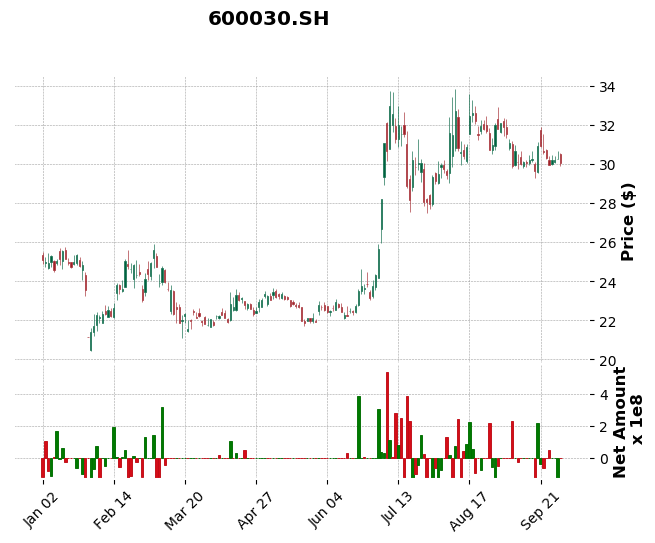

In [31]:
import tushare as ts
import pandas as pd
import mplfinance as fplt

def get_transform_data(df):
    df['date'] = pd.to_datetime(df['trade_date'], format='%Y%m%d')
    df.set_index('date', inplace=True)
    df = df.iloc[::-1]
    return df

def condition(date,df):
    if date in df.trade_date.values:
        return sum(df[df['trade_date']==date].net_amount)
    else:
        return 0

def candlestick_volume(ts_code,start,end):
    ts.set_token('303f0dbbabfad0fd3f9465368bdc62fc775bde6711d6b59c2ca10109')
    pro = ts.pro_api()
    price_df = ts.pro_bar(ts_code=ts_code, adj='qfq', start_date=start, end_date=end, adjfactor=True)
    name_df = pro.hsgt_top10(ts_code = ts_code,start_date = start, end_date = end, market_type='1')
    price_df['volume'] = price_df.apply(lambda x: condition(x.trade_date,name_df),axis = 1)
    price_df = get_transform_data(price_df)
    fplt.plot(
            price_df,
            type='candle',
            style='charles', 
            title=ts_code,
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Net Amount',
            )


if __name__ == "__main__":
    candlestick_volume('600030.SH','20200101','20200930')